In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('test.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [4]:
# test data doen't have the target variable..

### Categorical Features

In [16]:
categorical_nan = [feature for feature in data.columns if data[feature].dtype=='O' and data[feature].isna().sum()>1]
data[categorical_nan].head()

,MSZoning,Alley,Utilities,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,RH,NaN,AllPub,None,TA,TA,No,Rec,LwQ,Typ,NaN,Attchd,Unf,TA,TA,NaN,MnPrv,NaN
1,RL,NaN,AllPub,BrkFace,TA,TA,No,ALQ,Unf,Typ,NaN,Attchd,Unf,TA,TA,NaN,NaN,Gar2
2,RL,NaN,AllPub,None,Gd,TA,No,GLQ,Unf,Typ,TA,Attchd,Fin,TA,TA,NaN,MnPrv,NaN
3,RL,NaN,AllPub,BrkFace,TA,TA,No,GLQ,Unf,Typ,Gd,Attchd,Fin,TA,TA,NaN,NaN,NaN
4,RL,NaN,AllPub,None,Gd,TA,No,ALQ,Unf,Typ,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN


In [17]:
for feature in categorical_nan:
    print('The {} Feature has {}% of Missing Values'.format(feature, np.round(data[feature].isnull().mean(), 4)))

The MSZoning Feature has 0.0027% of Missing Values
The Alley Feature has 0.9267% of Missing Values
The Utilities Feature has 0.0014% of Missing Values
The MasVnrType Feature has 0.011% of Missing Values
The BsmtQual Feature has 0.0302% of Missing Values
The BsmtCond Feature has 0.0308% of Missing Values
The BsmtExposure Feature has 0.0302% of Missing Values
The BsmtFinType1 Feature has 0.0288% of Missing Values
The BsmtFinType2 Feature has 0.0288% of Missing Values
The Functional Feature has 0.0014% of Missing Values
The FireplaceQu Feature has 0.5003% of Missing Values
The GarageType Feature has 0.0521% of Missing Values
The GarageFinish Feature has 0.0535% of Missing Values
The GarageQual Feature has 0.0535% of Missing Values
The GarageCond Feature has 0.0535% of Missing Values
The PoolQC Feature has 0.9979% of Missing Values
The Fence Feature has 0.8012% of Missing Values
The MiscFeature Feature has 0.965% of Missing Values


### Imputing the categorical missing values with the new category 'Missing'

In [18]:
for feature in categorical_nan:
    data[feature] = data[feature].fillna('Missing')
    
data[categorical_nan].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

### Numerical Features

In [21]:
numerical_nan = [feature for feature in data.columns if feature not in categorical_nan and data[feature].isna().sum()>1]
data[numerical_nan].head()

,LotFrontage,MasVnrArea,BsmtFullBath,BsmtHalfBath,GarageYrBlt
0,80.0,0.0,0.0,0.0,1961.0
1,81.0,108.0,0.0,0.0,1958.0
2,74.0,0.0,0.0,0.0,1997.0
3,78.0,20.0,0.0,0.0,1998.0
4,43.0,0.0,0.0,0.0,1992.0


In [22]:
for feature in numerical_nan:
    print('The {} Feature has {}% of Missing Values'.format(feature, np.round(data[feature].isnull().mean(), 4)))

The LotFrontage Feature has 0.1556% of Missing Values
The MasVnrArea Feature has 0.0103% of Missing Values
The BsmtFullBath Feature has 0.0014% of Missing Values
The BsmtHalfBath Feature has 0.0014% of Missing Values
The GarageYrBlt Feature has 0.0535% of Missing Values


### Imputing the numerical missing values with thier medain

In [23]:
for feature in numerical_nan:
    median = data[feature].median()
    
    # capturing the missing value imporatnce
    data[feature+'_nan'] = np.where(data[feature].isna(), 1,0)
    
    data[feature] = data[feature].fillna(median)

data[numerical_nan].isna().sum()

LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
dtype: int64

In [24]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,BsmtFullBath_nan,BsmtHalfBath_nan,GarageYrBlt_nan
0,1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,...,0,6,2010,WD,Normal,0,0,0,0,0
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,...,12500,6,2010,WD,Normal,0,0,0,0,0
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,...,0,3,2010,WD,Normal,0,0,0,0,0
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,...,0,6,2010,WD,Normal,0,0,0,0,0
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,...,0,1,2010,WD,Normal,0,0,0,0,0


### Temporal Variables

In [28]:
year_feature = [feature for feature in data.columns if 'Year' in feature or 'Yr' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'GarageYrBlt_nan']

In [25]:
for feature in ['YearBuilt', 'GarageYrBlt','YearRemodAdd']:
    
      # filling the values with the difference b\w them and YrSold
    # transforming year value into numeric value
    
    data[feature] = data['YrSold'] - data[feature]
    
      # Not transforming the YrSold feature bcoz the SalePrice decreases as the YrSold increases

In [29]:
data[year_feature].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,GarageYrBlt_nan
0,49,49,49.0,2010,0
1,52,52,52.0,2010,0
2,13,12,13.0,2010,0
3,12,12,12.0,2010,0
4,18,18,18.0,2010,0


### Log Transformation on skewed data..

In [31]:
skew_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for feature in skew_features:
    data[feature] = np.log(data[feature])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

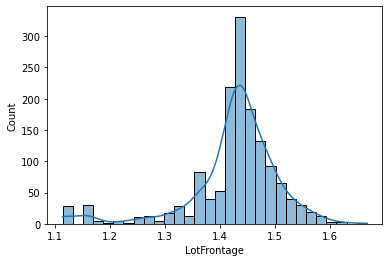

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

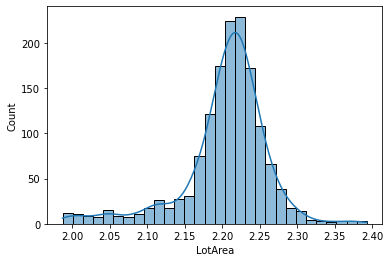

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

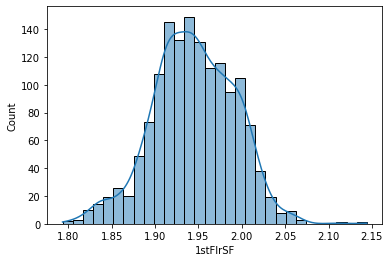

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

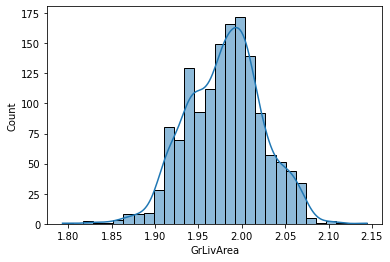

In [35]:
for feature in skew_features:
    sns.histplot(data[feature], kde=True, bins=30)
    plt.show()

### Handling Rare Categorical Variable

In [36]:
# the category that has occurence less than the 0.1% 
# we will label that as a new category 'Rare_var'

In [38]:
categorical_feature = [feature for feature in data.columns if data[feature].dtype == 'O']
data[categorical_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal
1,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Missing,Missing,Gar2,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal
3,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,Missing,Missing,Missing,WD,Normal
4,RL,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal


In [42]:
data['SalePrice'] = np.zeros(data.shape[0])

In [45]:
for feature in categorical_feature:
    temp = data.groupby(feature)['SalePrice'].count()/len(data)
    temp_df = temp[temp>0.01].index
    data[feature] = np.where(data[feature].isin(temp_df), data[feature], 'Rara_var')

### Target Guided Ordinal Encoding

In [47]:
for feature in categorical_feature:
    ordered_label = data.groupby(feature)['SalePrice'].mean().sort_values().index
    ordered_label = {k:i for i,k in enumerate(ordered_label, 0)}
    data[feature] = data[feature].map(ordered_label)
    

In [48]:
data[categorical_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,4,0,1,3,3,0,3,0,19,1,...,1,3,3,3,2,0,3,0,4,2
1,2,0,1,0,3,0,0,0,19,2,...,1,3,3,3,2,0,2,1,4,2
2,2,0,1,0,3,0,3,0,14,2,...,1,0,3,3,2,0,3,0,4,2
3,2,0,1,0,3,0,3,0,14,2,...,1,0,3,3,2,0,2,0,4,2
4,2,0,1,0,1,0,3,0,9,2,...,1,2,3,3,2,0,2,0,4,2


### MinMax Scalar

In [51]:
feature_scalce = [feature for feature in data.columns if feature not in ['Id']]
data[feature_scalce].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,BsmtFullBath_nan,BsmtHalfBath_nan,GarageYrBlt_nan,SalePrice
0,20,4,1.477511,2.236515,0,1,3,3,0,3,...,6,2010,4,2,0,0,0,0,0,0.0
1,20,2,1.480342,2.258184,0,1,0,3,0,0,...,6,2010,4,2,0,0,0,0,0,0.0
2,60,2,1.459560,2.254927,0,1,0,3,0,3,...,3,2010,4,2,0,0,0,0,0,0.0
3,60,2,1.471717,2.220088,0,1,0,3,0,3,...,6,2010,4,2,0,0,0,0,0,0.0
4,120,2,1.324738,2.142204,0,1,0,1,0,3,...,1,2010,4,2,0,0,0,0,0,0.0


In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = scaler.fit_transform(data[feature_scalce])
df = pd.DataFrame(df, columns=data[feature_scalce].columns)

In [60]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,BsmtFullBath_nan,BsmtHalfBath_nan,GarageYrBlt_nan,SalePrice
0,0.000000,1.0,0.657288,0.614997,0.0,0.5,1.0,1.000000,0.0,0.75,...,0.454545,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.5,0.662397,0.668388,0.0,0.5,0.0,1.000000,0.0,0.00,...,0.454545,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
2,0.235294,0.5,0.624887,0.660362,0.0,0.5,0.0,1.000000,0.0,0.75,...,0.181818,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
3,0.235294,0.5,0.646830,0.574520,0.0,0.5,0.0,1.000000,0.0,0.75,...,0.454545,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4,0.588235,0.5,0.381547,0.382619,0.0,0.5,0.0,0.333333,0.0,0.75,...,0.000000,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
# Test data also Scaled down from 0 to 1